<a href="https://colab.research.google.com/github/Gabriel-R-A/SPOTIFY-SEQUENTIAL-SKIP-PREDICTION-CHALLENGE-/blob/main/TCC_P%C3%B3s_CDML_Gabriel_Rodrigues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

# Descompactando arquivos e visualizando os datasets

In [ ]:
!tar -xf '/content/drive/MyDrive/TESTE TCC/training mini/16772e7f-7871-4d42-a44f-5f399f40fd94_training_set_track_features_mini'

In [ ]:
track_df = pd.read_csv('data/track_features/tf_mini.csv')

train_df = pd.read_csv('data/training_set/log_mini.csv')

## Análise do dataset de Track Features

In [ ]:
track_df.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [ ]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

In [ ]:
track_df.describe()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,...,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000
mean,222.267980,2010.324748,99.455131,0.250336,0.492075,0.514526,0.611742,8.215950,0.641440,0.996548,...,3.913163,0.487804,-0.332295,0.202193,0.153935,-0.040526,-0.027247,0.049475,-0.197758,0.005153
std,72.224839,11.471866,1.139222,0.276047,0.158102,0.182595,0.166146,2.410626,0.207957,0.045611,...,0.410036,0.246376,0.416320,0.254024,0.212660,0.333129,0.377457,0.144205,0.349840,0.324259
min,30.013330,1950.000000,90.018900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647
25%,183.933334,2009.000000,99.509670,0.025291,0.374378,0.372463,0.502499,6.356671,0.507839,0.975910,...,4.000000,0.292559,-0.745148,0.086460,0.051604,-0.294574,-0.318751,-0.038337,-0.444849,-0.176821
50%,214.866669,2015.000000,99.865444,0.135821,0.493764,0.522266,0.625145,8.015075,0.661368,1.003790,...,4.000000,0.478244,-0.334799,0.265535,0.207705,-0.001755,-0.176974,0.062719,-0.298599,0.090423
75%,250.426666,2017.000000,99.961131,0.406142,0.604994,0.655912,0.736241,9.792092,0.803185,1.026137,...,4.000000,0.677947,0.045921,0.359553,0.296132,0.146828,0.280852,0.160366,-0.075158,0.194285
max,1787.760986,2018.000000,99.999997,0.995796,0.990419,0.972590,0.984952,32.342781,0.999877,1.103213,...,5.000000,0.999990,0.932165,0.812837,0.605288,1.074504,0.895769,0.380279,0.966760,1.152213


In [ ]:
track_df.select_dtypes(exclude='float64').head()

,track_id,release_year,key,mode,time_signature
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,1950,0,major,4
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,1950,0,major,3
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,1951,0,minor,4
3,t_070a63a0-744a-434e-9913-a97b02926a29,1951,0,major,4
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,1951,0,major,4


In [ ]:
track_df.isnull().sum()

track_id                  0
duration                  0
release_year              0
us_popularity_estimate    0
acousticness              0
beat_strength             0
bounciness                0
danceability              0
dyn_range_mean            0
energy                    0
flatness                  0
instrumentalness          0
key                       0
liveness                  0
loudness                  0
mechanism                 0
mode                      0
organism                  0
speechiness               0
tempo                     0
time_signature            0
valence                   0
acoustic_vector_0         0
acoustic_vector_1         0
acoustic_vector_2         0
acoustic_vector_3         0
acoustic_vector_4         0
acoustic_vector_5         0
acoustic_vector_6         0
acoustic_vector_7         0
dtype: int64

In [ ]:
track_df.duplicated().sum()

0

# Visualização dos dados de caracteristicas das faixas (track_df)

In [ ]:
track_df['us_popularity_estimate']

0        99.975414
1        99.969430
2        99.602549
3        99.665018
4        99.991764
           ...    
50699    99.315966
50700    99.918573
50701    98.517692
50702    99.902866
50703    99.961653
Name: us_popularity_estimate, Length: 50704, dtype: float64

Text(0.5, 1.0, 'Distribuição por duração das faixas')

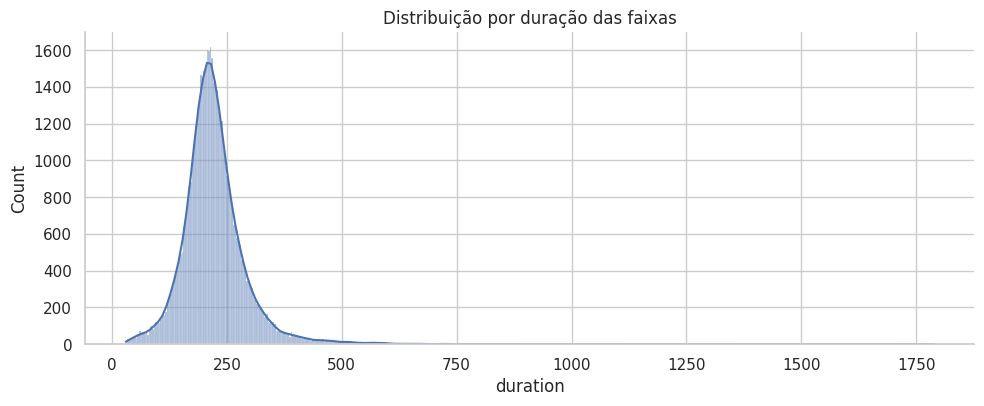

In [ ]:
sns.displot(track_df.duration, kde=True, height=4, aspect=2.5)
plt.title("Distribuição por duração das faixas")

Text(0.5, 1.0, 'Distribuição por ano de lançamento')

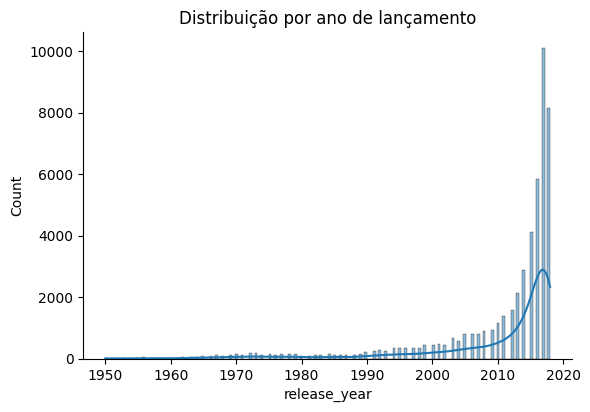

In [ ]:
# Criando um plot para distribuição de musicas lançadas por ano
sns.displot(track_df.release_year, kde=True, height=4, aspect=1.5)
plt.title("Distribuição por ano de lançamento")

### Examinando as tonalidades (key) de cada faixa
- Foi feita a distribuição das tonalidades por cifras
- Nesse caso as notas serão representadas por letras sendo:
>       "C" = dó
        "C#" = dó sustenido / bemol
        "D" = ré
        "D#" = ré sustenido / bemol
        "E" = mi
        "F" = fá
        "F#" = fá sustenido / bemol
        "G" = sol
        "G#" = sol sustenido / bemol
        "A" = lá
        "A#" = lá sustenido / bemol
        "B" = si

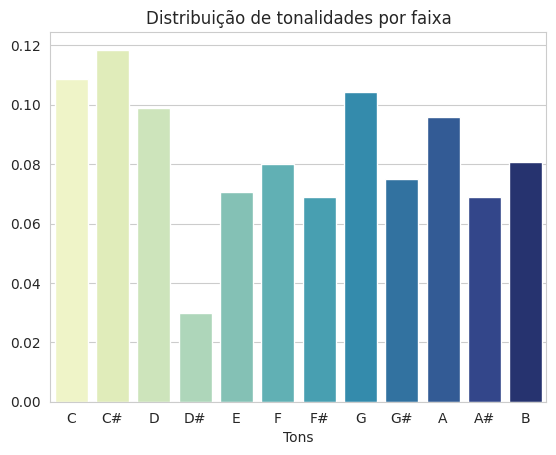

In [ ]:
keys = track_df.key.value_counts().sort_index()

sns.set_style("whitegrid")
paleta_cores = sns.color_palette("YlGnBu", n_colors=len(keys))

sns.barplot(
    x=["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"],
    # vamos dividir cada valor de keys pelo total de keys no dataframe para normalizar os valores
    # criando uma proporção de cada tonalidade em relação ao total de ocorrencia na nossa base
    y=keys.values/keys.sum(),
    palette=paleta_cores)

plt.title("Distribuição de tonalidades por faixa")
plt.xlabel("Tons")

plt.show()

### Examinando os Modos/Escalas do dataset

In [ ]:
print('Total de faixas por escala:\n',track_df['mode'].value_counts())
print('-'*20)
print('Distribuição de escalas por faixa:\n',track_df['mode'].value_counts() / track_df['mode'].count())

Total de faixas por escala:
 major    32555
minor    18149
Name: mode, dtype: int64
--------------------
Distribuição de escalas por faixa:
 major    0.64206
minor    0.35794
Name: mode, dtype: float64


#### Examinando os compassos/assinaturas de tempo de cada faixa do dataset

In [ ]:
tf = track_df.time_signature.value_counts().sort_index()
frequencias_relativas = tf / tf.sum()
print(frequencias_relativas)

0    0.000552
1    0.008145
3    0.076858
4    0.897779
5    0.016665
Name: time_signature, dtype: float64


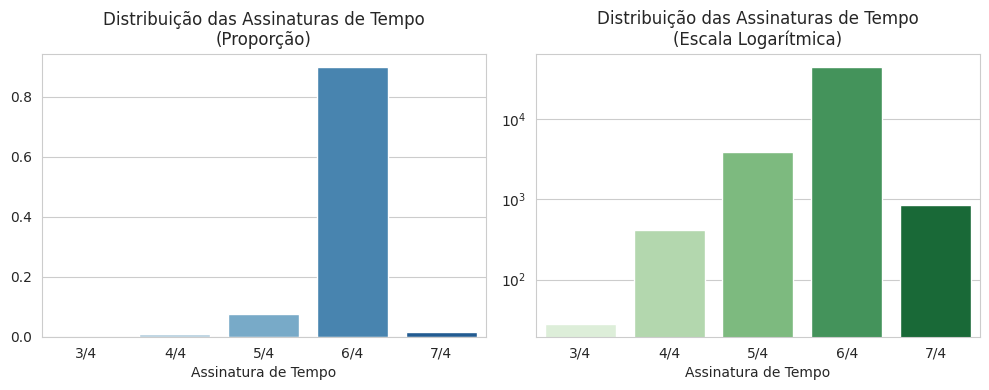

In [ ]:
plt.figure(figsize=(10, 4))

# Gráfico de barras das proporções das assinaturas de tempo
plt.subplot(121)
sns.barplot(x=[f"{i}/4" for i in range(3, 8)], y=tf.values / tf.sum(), palette='Blues')
plt.title("Distribuição das Assinaturas de Tempo\n(Proporção)")
plt.xlabel("Assinatura de Tempo")

# Gráfico de barras das contagens das assinaturas de tempo (escala logarítmica)
plt.subplot(122)
sns.barplot(x=[f"{i}/4" for i in range(3, 8)], y=tf.values, palette='Greens')
plt.title("Distribuição das Assinaturas de Tempo\n(Escala Logarítmica)")
plt.xlabel("Assinatura de Tempo")
plt.yscale('log')

plt.tight_layout()
plt.show()


-

In [ ]:
track_df['mode'] = (track_df['mode'] == 'major').astype('int32')
track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

In [ ]:
# sns.pairplot(track_df)
# plt.show()

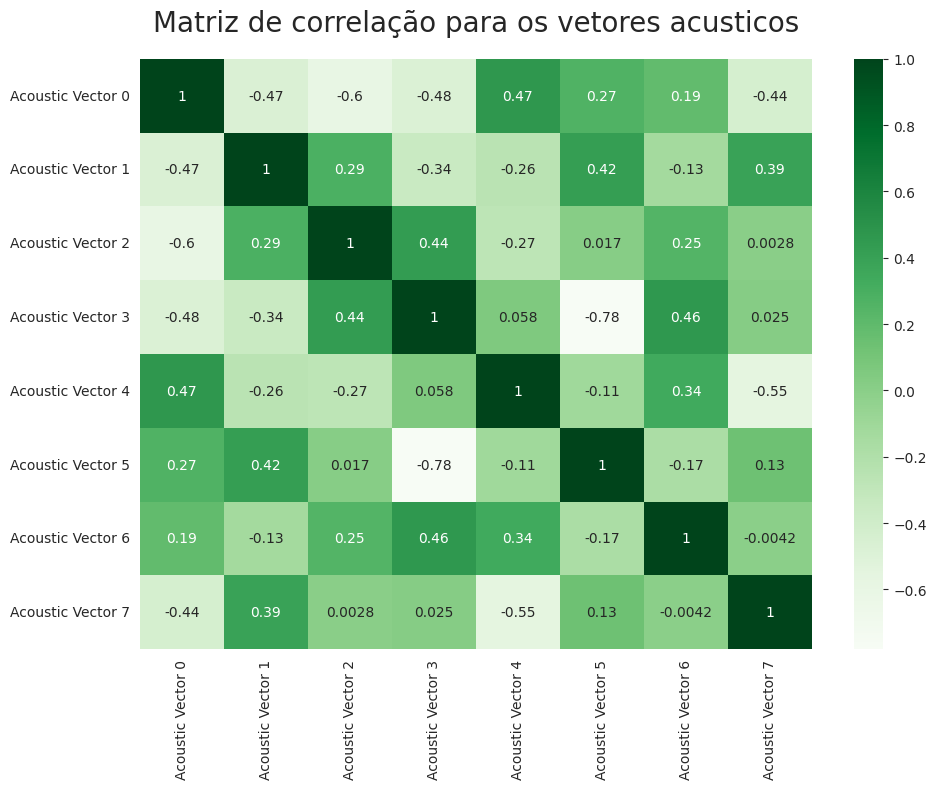

In [ ]:
plt.figure(figsize=(10, 8))
columns = [f"acoustic_vector_{i}" for i in range(8)]
colunas_renomeadas = [f"Acoustic Vector {i}" for i in range(8)]
heat_track_df = track_df[columns].rename(columns=dict(zip(columns, colunas_renomeadas)))

corr_matrix = heat_track_df.corr()

sns.heatmap(corr_matrix, cmap="Greens", annot=True)

plt.title("Matriz de correlação para os vetores acusticos", fontsize=20, pad=20)

plt.xlabel("")
plt.ylabel("")

plt.tight_layout()
plt.show()


# Análise do dataset de Treino(train)

In [ ]:
train_df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_id                       167880 non-null  object
 1   session_position                 167880 non-null  int64 
 2   session_length                   167880 non-null  int64 
 3   track_id_clean                   167880 non-null  object
 4   skip_1                           167880 non-null  bool  
 5   skip_2                           167880 non-null  bool  
 6   skip_3                           167880 non-null  bool  
 7   not_skipped                      167880 non-null  bool  
 8   context_switch                   167880 non-null  int64 
 9   no_pause_before_play             167880 non-null  int64 
 10  short_pause_before_play          167880 non-null  int64 
 11  long_pause_before_play           167880 non-null  int64 
 12  hist_user_behavi

In [ ]:
train_df.describe()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,14.193084
std,5.457638,3.422025,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,5.996243
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,23.000000


In [ ]:
train_df.isnull().sum()

session_id                         0
session_position                   0
session_length                     0
track_id_clean                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
dtype: int64

In [ ]:
train_df.duplicated().sum()

0

# Visualizando dos dados de Treino(train_df)

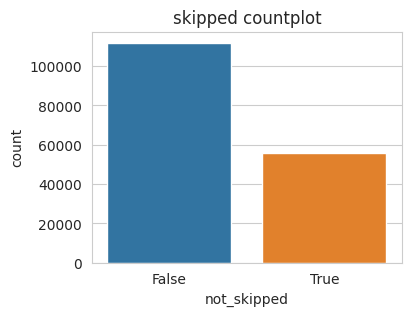

In [ ]:
# Check the class balance in Target feature
plt.figure(figsize=(4, 3))
sns.countplot(x="not_skipped",data=train_df)
plt.title("skipped countplot")
plt.show()

In [ ]:
print('Comparativo de faixas puladas(true) para nao puladas(false):\n',train_df['not_skipped'].value_counts())
print('-'*20)
porcentagem = train_df['not_skipped'].value_counts() / len(train_df['not_skipped']) * 100
print('Porcentagem de faixas puladas (True) para não puladas (False):\n')
for valor, percentual in porcentagem.items():
    print(f'{valor}: {percentual:.2f}%')


Comparativo de faixas puladas(true) para nao puladas(false):
 False    111996
True      55884
Name: not_skipped, dtype: int64
--------------------
Porcentagem de faixas puladas (True) para não puladas (False):

False: 66.71%
True: 33.29%


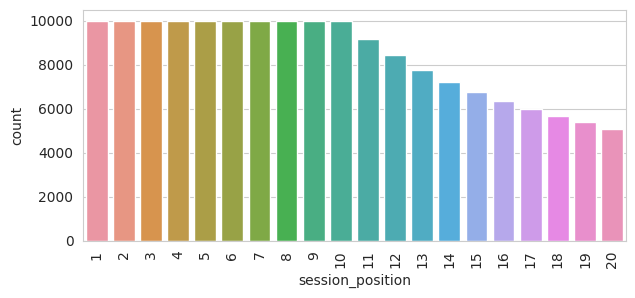

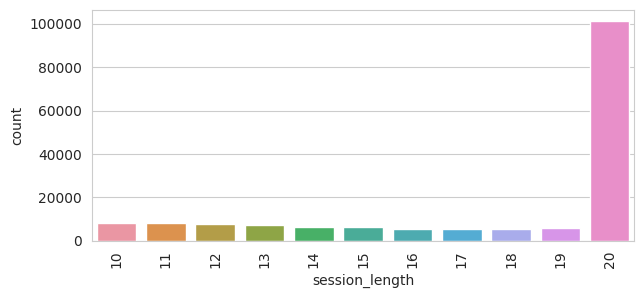

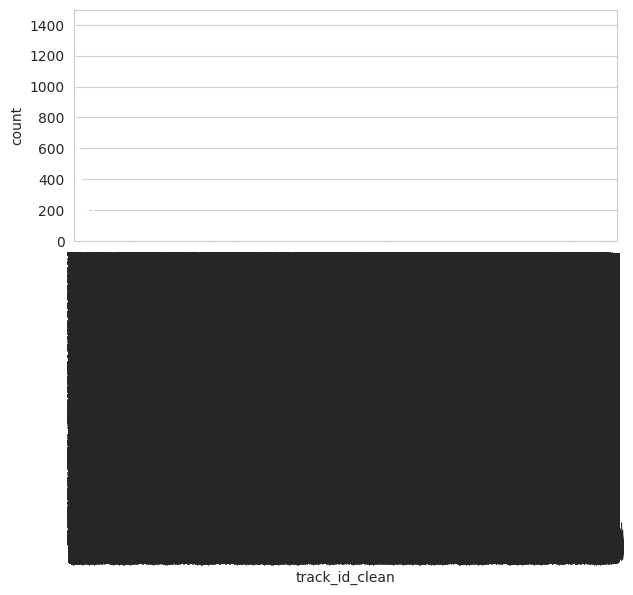

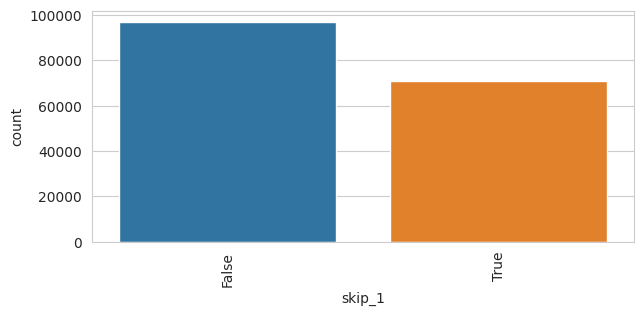

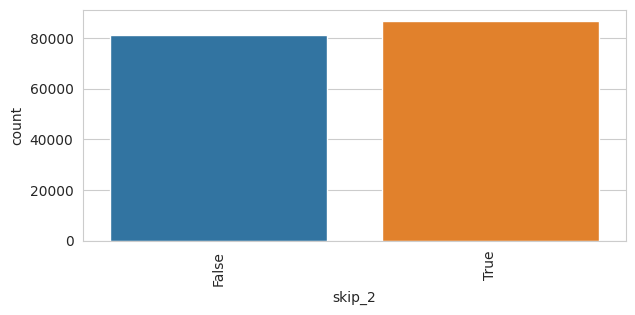

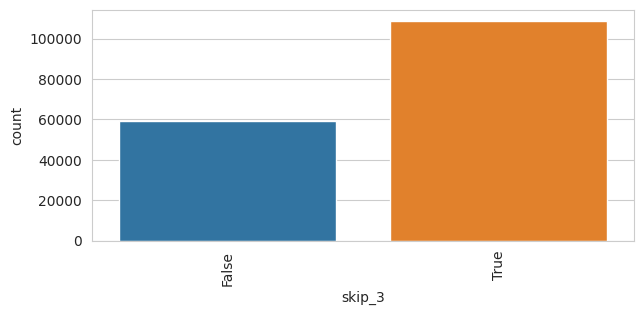

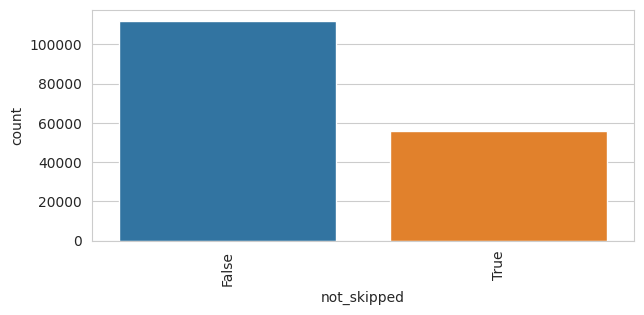

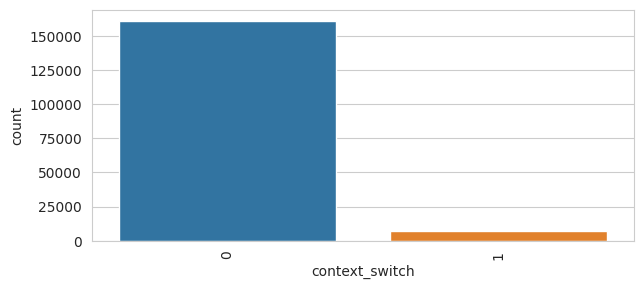

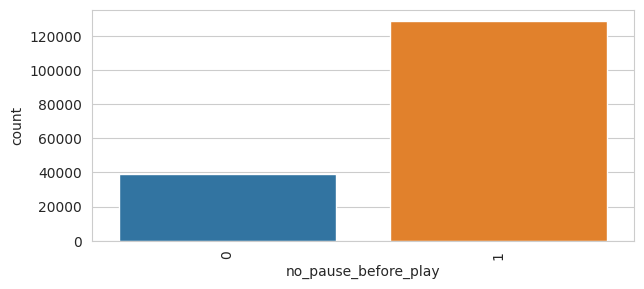

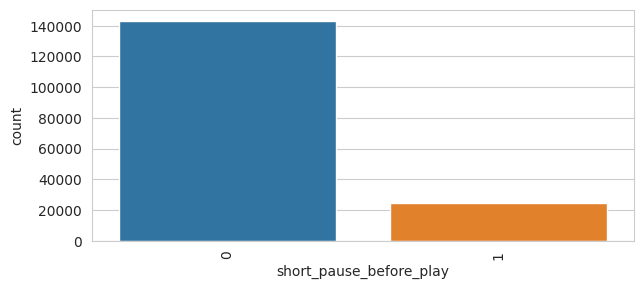

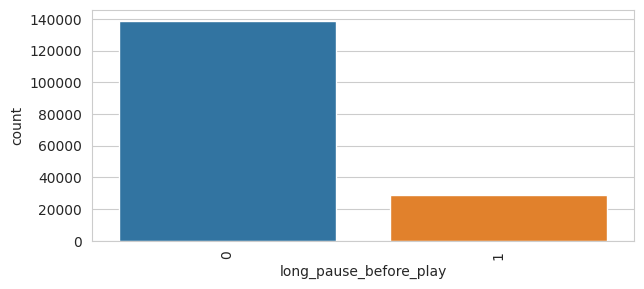

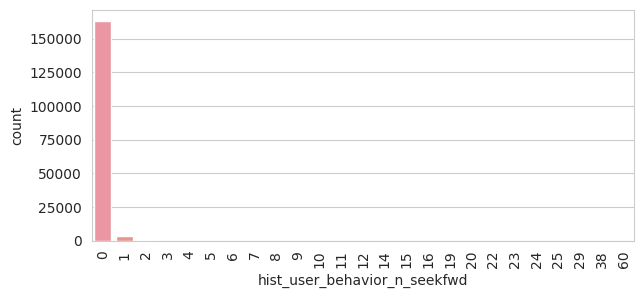

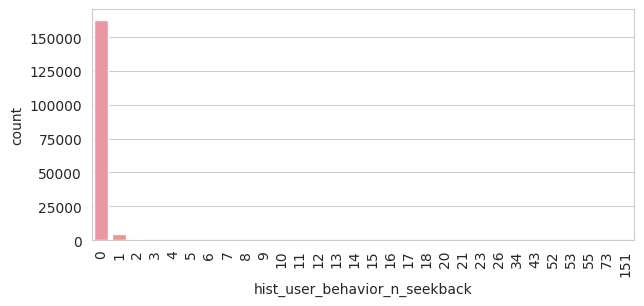

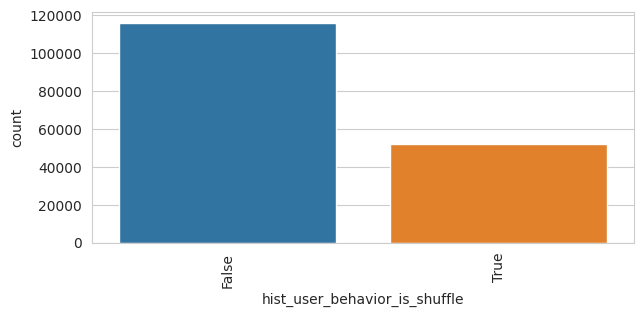

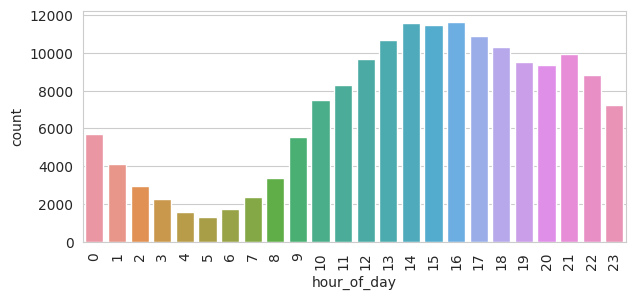

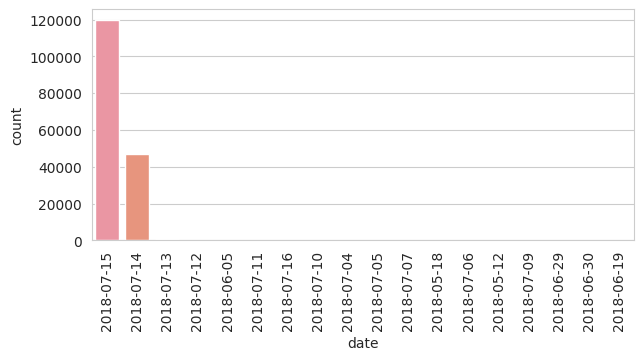

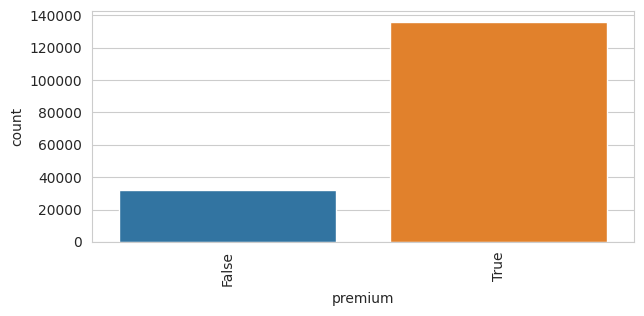

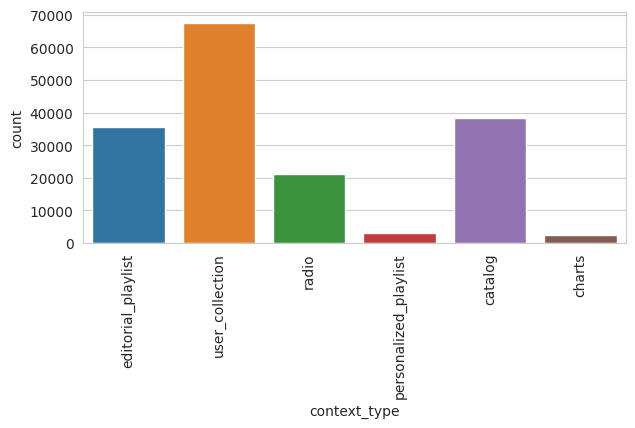

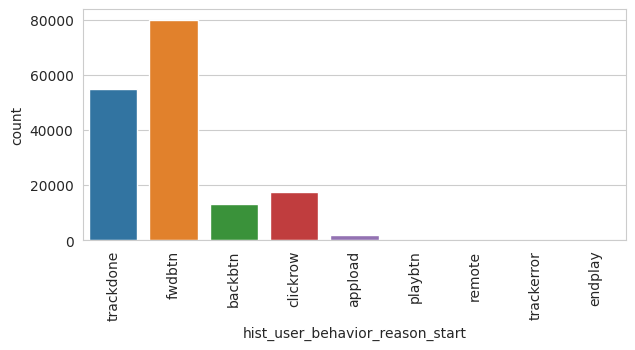

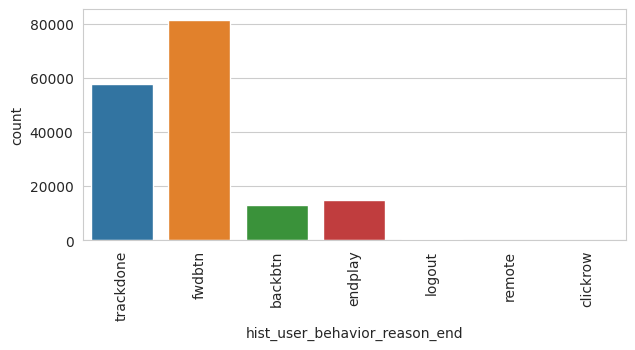

In [ ]:
# Contagem de observações de cada coluna do dataset
columns = train_df.columns[1:] # foi ignorada as colunas session_id pois não é relevante nesse caso
for col in columns:
    plt.figure(figsize=(7, 3))
    sns.countplot(x=col, data=train_df)
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.show()

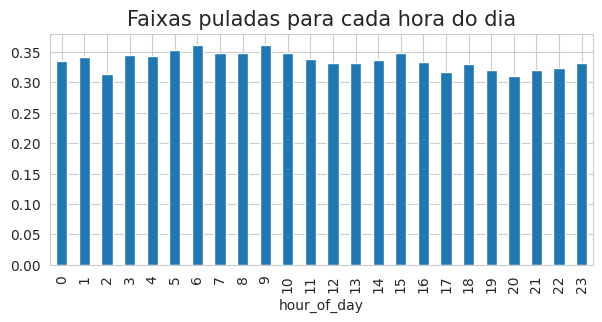

In [ ]:
#Porcentagem de faixas puladas pela hora do dia
train_df.groupby("hour_of_day")["not_skipped"].mean().plot(kind="bar",figsize=(7,3))
plt.title("Faixas puladas para cada hora do dia",fontsize=15)
plt.show()

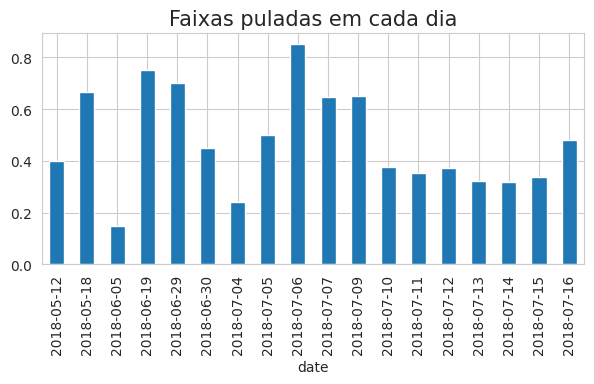

In [ ]:
# Porcentagem de faixas puladas em cada dia
train_df.groupby("date")["not_skipped"].mean().plot(kind="bar",figsize=(7,3))
plt.title("Faixas puladas em cada dia",fontsize=15)
plt.show()

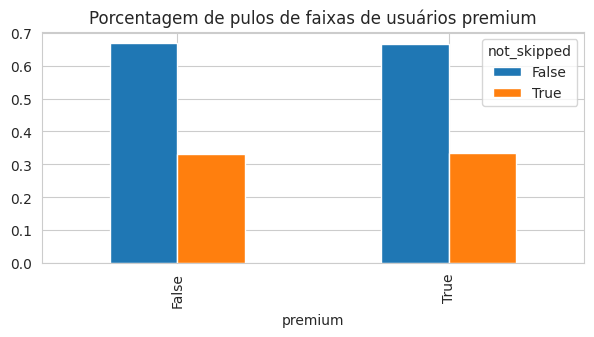

In [ ]:
# Quantidade de skips por usários premium
crosstab = pd.crosstab(train_df["premium"],train_df["not_skipped"])
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(7,3))
plt.title("Porcentagem de pulos de faixas de usuários premium")
plt.show()